In [ ]:
##########################################################
# DSC5103 Statistics
# Session 8. Regularization in Regression
# 2016.11
##########################################################

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error

In [2]:
## remove na values
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [3]:
## patsy.dmatrices is a handy function that converts data from formula form into matrix form
import patsy
f = 'Salary ~ AtBat+Hits+HmRun+Runs+RBI+Walks+Years+CAtBat+CHits+CHmRun+CRuns+CRBI+CWalks+League+Division+PutOuts+Assists+Errors+NewLeague'
y,X_ = patsy.dmatrices(f, df, return_type='dataframe') 
y = y.Salary
X = X_.drop(['Intercept'], axis=1)
X.info()

# alternatively, we can manually create the matrix
# dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
# y = df.Salary
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
# X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
# X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
# X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
League[T.N]       263 non-null float64
Division[T.W]     263 non-null float64
NewLeague[T.N]    263 non-null float64
AtBat             263 non-null float64
Hits              263 non-null float64
HmRun             263 non-null float64
Runs              263 non-null float64
RBI               263 non-null float64
Walks             263 non-null float64
Years             263 non-null float64
CAtBat            263 non-null float64
CHits             263 non-null float64
CHmRun            263 non-null float64
CRuns             263 non-null float64
CRBI              263 non-null float64
CWalks            263 non-null float64
PutOuts           263 non-null float64
Assists           263 non-null float64
Errors            263 non-null float64
dtypes: float64(19)
memory usage: 41.1 KB


In [4]:
# the alpha in sklearn is the penalty, which is the lamda in R
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

In [5]:
### Ridge Regression
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

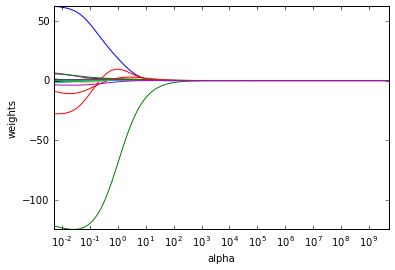

In [6]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [7]:
# by default, the function performs LOOCV
# this can be changed using the argument cv
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(X, y)
ridgecv.alpha_

0.011550648500415791

In [8]:
ridge_cv = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_cv.fit(X, y)
pred_cv = ridge_cv.predict(X)
print('(Intercept)       ', ridge_cv.intercept_)
print(pd.Series(ridge_cv.coef_, index=X.columns)) # Print coefficients
print('MSE', mean_squared_error(y, pred_cv))        # Calculate the test MSE

(Intercept)        143.794232986
League[T.N]        60.880201
Division[T.W]    -123.216561
NewLeague[T.N]    -27.477702
AtBat              -1.526224
Hits                5.339603
HmRun               0.407402
Runs               -0.139940
RBI                 0.129590
Walks               5.046306
Years             -10.586076
CAtBat             -0.047169
CHits               0.189090
CHmRun              0.694483
CRuns               0.643666
CRBI                0.367996
CWalks             -0.573826
PutOuts             0.278350
Assists             0.278187
Errors             -3.790648
dtype: float64
MSE 93698.3811822


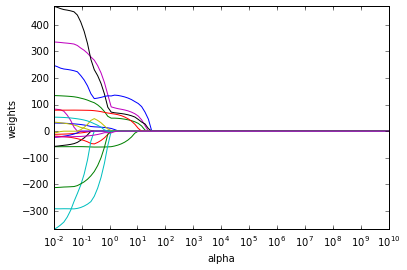

In [10]:
### The Lasso
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [17]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True) 
lassocv.fit(X, y)

lasso.set_params(alpha=lassocv.alpha_) # reset the alpha
lasso.fit(X, y)
lapred = lasso.predict(X)
print('(Intercept)      ', lasso.intercept_)
# Some of the coefficients are now reduced to exactly zero.
print(pd.Series(lasso.coef_, index=X.columns)) # Print coefficients
print('MSE', mean_squared_error(y, pred_cv))        # Calculate the test MSE

(Intercept)       122.021683216
League[T.N]        32.131777
Division[T.W]    -119.112716
NewLeague[T.N]     -0.000000
AtBat              -1.542786
Hits                5.657777
HmRun               0.000000
Runs               -0.000000
RBI                 0.000000
Walks               4.712335
Years              -9.322016
CAtBat             -0.000000
CHits               0.000000
CHmRun              0.528469
CRuns               0.659596
CRBI                0.382432
CWalks             -0.525993
PutOuts             0.272381
Assists             0.170881
Errors             -2.009794
dtype: float64
MSE 93698.3811822


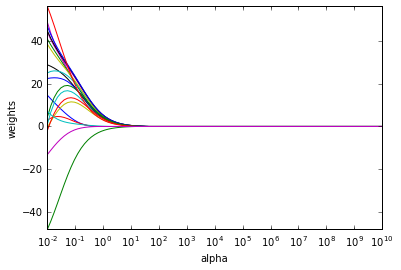

In [18]:
### The Elastic Net with a given l1_ratio
# when 0 < l1_ratio < 1, it becomes elastic net
enet = ElasticNet(l1_ratio=0.7, normalize=True)
coefs = []

for a in alphas:
    enet.set_params(alpha=a)
    enet.fit(scale(X), y)
    coefs.append(enet.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [19]:
enet2 = ElasticNet(l1_ratio=0.7, normalize=True)
enetcv = ElasticNetCV(alphas=None, cv=10, l1_ratio=0.7, normalize=True)
enetcv.fit(X, y)
enet2.set_params(alpha=enetcv.alpha_)
enet2.fit(X, y)
print('(Intercept)       ', enet2.intercept_)
print(pd.Series(enet2.coef_, index=X.columns)) # Print coefficients
print('MSE', mean_squared_error(y, enet2.predict(X)))        # Calculate the test MSE

(Intercept)        65.2516169282
League[T.N]       12.258479
Division[T.W]    -50.711387
NewLeague[T.N]     8.021974
AtBat              0.113153
Hits               0.626526
HmRun              1.224650
Runs               0.910571
RBI                0.833389
Walks              1.269102
Years              2.676324
CAtBat             0.010651
CHits              0.045201
CHmRun             0.327464
CRuns              0.090420
CRBI               0.094290
CWalks             0.072452
PutOuts            0.110918
Assists            0.013989
Errors            -0.600155
dtype: float64
MSE 114419.390048


In [20]:
ratios = np.arange(0.1, 1.01, 0.1)
encv_error = pd.DataFrame({'ratio': ratios})
encv_error['alpha'] = 0
encv_error['mse'] = 0

In [21]:
for r in ratios:
    enetcv = ElasticNetCV(alphas=None, cv=10, l1_ratio=r, normalize=True)
    enetcv.fit(X, y)
    enet = ElasticNet(l1_ratio=r, normalize=True)
    enet.set_params(alpha=enetcv.alpha_)
    enet.fit(X, y)
    encv_error.loc[(encv_error['ratio'] == r), 'alpha'] = enetcv.alpha_
    encv_error.loc[(encv_error['ratio'] == r), 'mse'] = mean_squared_error(y, enet.predict(X))

In [22]:
print(encv_error)

   ratio     alpha            mse
0    0.1  0.157414  177001.852249
1    0.2  0.078707  158038.019414
2    0.3  0.052471  143942.054064
3    0.4  0.039353  133381.357257
4    0.5  0.031483  125394.686129
5    0.6  0.026236  119263.705879
6    0.7  0.022488  114419.390048
7    0.8  0.019677  110343.211048
8    0.9  0.017490  106256.346357
9    1.0  0.168790   94585.415278
